### Read the dataset

In [3]:
import pandas as pd
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.shape

(200, 6)

In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: title={'center': 'Countplot'}, xlabel='Drug'>

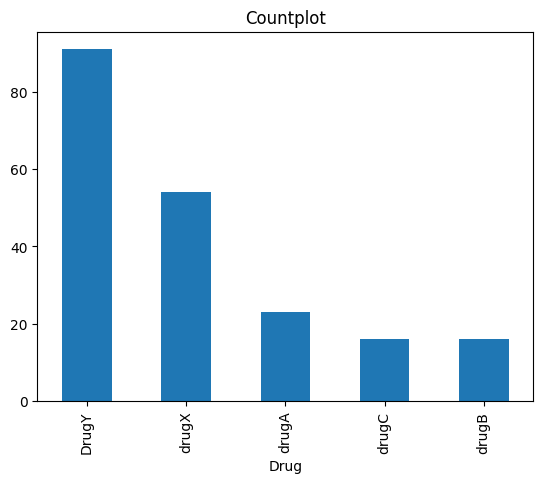

In [9]:
df['Drug'].value_counts().plot(kind='bar',title='Countplot')

### Seperate X and Y Features

In [10]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [11]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [12]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


### seperate cat and con features

In [13]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])


In [14]:
cat

['Sex', 'BP', 'Cholesterol']

In [15]:
con

['Age', 'Na_to_K']

### Create a preprocessing pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [18]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [19]:
X_pre = pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [20]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [21]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Apply train test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3,random_state=42)

In [23]:
xtrain.shape

(140, 9)

In [24]:
xtest.shape

(60, 9)

In [25]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
169,-1.473377,-0.669244,1.0,0.0,1.0,0.0,0.0,1.0,0.0
97,0.708057,1.292073,1.0,0.0,1.0,0.0,0.0,1.0,0.0
31,1.798775,-0.904468,0.0,1.0,1.0,0.0,0.0,1.0,0.0
12,-0.079683,-0.098320,0.0,1.0,0.0,1.0,0.0,1.0,0.0
35,0.102103,-1.221155,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [26]:
ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [27]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15,-1.715759,-0.078892,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,0.889843,-0.782762,1.0,0.0,0.0,1.0,0.0,1.0,0.0
128,0.162699,2.422679,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [28]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [29]:
ytrain.value_counts()

Drug 
DrugY    65
drugX    36
drugA    16
drugB    13
drugC    10
Name: count, dtype: int64

In [30]:
ytest.value_counts()

Drug 
DrugY    26
drugX    18
drugA     7
drugC     6
drugB     3
Name: count, dtype: int64

### Create a random forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=5, min_samples_leaf=3, criterion='gini')
model.fit(xtrain, ytrain)

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=1)

In [32]:
model.score(xtrain, ytrain)

0.4642857142857143

In [33]:
model.score(xtest, ytest)

0.43333333333333335

### Randomized search CV is faster compared to gridsearchCV

In [34]:
params = {'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9],
          'criterion':['gini', 'entropy']}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [36]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'max_depth': 4,
 'criterion': 'entropy'}

In [37]:
rscv.best_score_

0.9862857142857143

In [38]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=6,
                       n_estimators=200)

### Evaluate model in train and test

In [39]:
best_rfc.score(xtrain, ytrain)

1.0

In [40]:
best_rfc.score(xtest, ytest)

1.0

### Predict results for train and test

In [41]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [42]:
ypred_tr[0:5]

array(['drugA', 'DrugY', 'drugB', 'DrugY', 'drugX'], dtype=object)

In [43]:
ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [44]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [45]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


### Create confusion matrix for test results

In [46]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

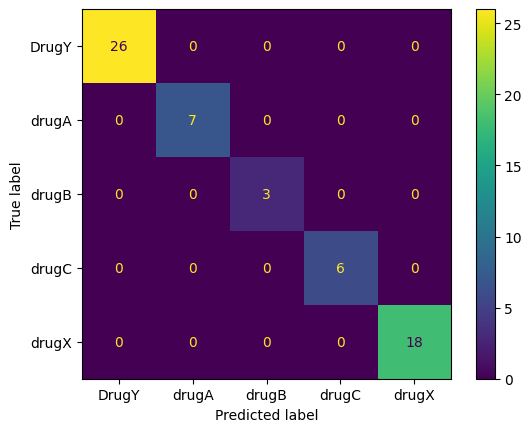

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

### Create a classification report

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



### predict the probabilities

In [49]:
yprob_tr = best_rfc.predict_proba(xtrain)
yprob_ts = best_rfc.predict_proba(xtest)


In [50]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [51]:
yprob_ts[0:5]

array([[0.04745328, 0.03488799, 0.00929177, 0.09347519, 0.81489177],
       [0.96122088, 0.03218485, 0.00301961, 0.00166667, 0.00190799],
       [0.06125308, 0.04664636, 0.00138996, 0.0037495 , 0.88696109],
       [0.1274473 , 0.0036014 , 0.02955828, 0.59535227, 0.24404075],
       [0.91522214, 0.00125   , 0.        , 0.00487179, 0.07865606]])

In [52]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

### Feature Importances

In [53]:
imp = best_rfc.feature_importances_
imp

array([0.09790258, 0.49419967, 0.00580565, 0.00354584, 0.19582268,
       0.0625724 , 0.07872961, 0.03328737, 0.0281342 ])

In [54]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [56]:
imp = pd.Series(imp)
imp

0    0.097903
1    0.494200
2    0.005806
3    0.003546
4    0.195823
5    0.062572
6    0.078730
7    0.033287
8    0.028134
dtype: float64

In [57]:
imp.index = xtrain.columns
imp

num__Age                   0.097903
num__Na_to_K               0.494200
cat__Sex_F                 0.005806
cat__Sex_M                 0.003546
cat__BP_HIGH               0.195823
cat__BP_LOW                0.062572
cat__BP_NORMAL             0.078730
cat__Cholesterol_HIGH      0.033287
cat__Cholesterol_NORMAL    0.028134
dtype: float64

In [58]:
imp = imp.sort_values(ascending=False)
imp

num__Na_to_K               0.494200
cat__BP_HIGH               0.195823
num__Age                   0.097903
cat__BP_NORMAL             0.078730
cat__BP_LOW                0.062572
cat__Cholesterol_HIGH      0.033287
cat__Cholesterol_NORMAL    0.028134
cat__Sex_F                 0.005806
cat__Sex_M                 0.003546
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

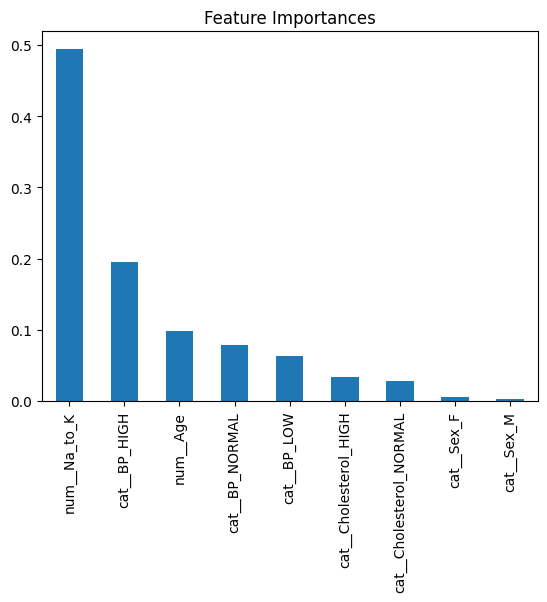

In [59]:
imp.plot(kind='bar', title='Feature Importances')

#### Predicting out of sample data

In [60]:
xnew = pd.read_csv('test_drugs.csv')
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,26,M,LOW,NORMAL,20.909
1,35,F,HIGH,HIGH,12.894
2,48,M,HIGH,NORMAL,10.446
3,40,F,NORMAL,HIGH,10.103
4,16,M,LOW,HIGH,12.006
5,49,M,HIGH,NORMAL,8.700
6,58,F,LOW,HIGH,26.645
7,28,F,LOW,HIGH,13.127
8,50,F,NORMAL,NORMAL,17.211
9,23,M,LOW,HIGH,7.298


In [61]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          30 non-null     int64  
 1   Sex          30 non-null     object 
 2   BP           30 non-null     object 
 3   Cholesterol  30 non-null     object 
 4   Na_to_K      30 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


#### Always apply pre.transform

In [62]:
xnew_pre = pre.transform(xnew)
xnew_pre[0:5]

array([[-1.10980481,  0.6695254 ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ],
       [-0.56444618, -0.44276176,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.22329406, -0.78248465,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.26146916, -0.83008471,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [-1.71575884, -0.56599457,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ]])

In [63]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.109805,0.669525,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.564446,-0.442762,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.223294,-0.782485,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.261469,-0.830085,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.283889,-1.024787,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6,0.829248,1.465543,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,-0.988614,-0.410427,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.344485,0.156333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,-1.291591,-1.219351,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Predict the results with probabilities

In [64]:
pred = best_rfc.predict(xnew_pre)
pred

array(['DrugY', 'drugA', 'drugA', 'drugX', 'drugC', 'drugA', 'DrugY',
       'drugC', 'DrugY', 'drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugA', 'DrugY'], dtype=object)

In [65]:
prob = best_rfc.predict_proba(xnew_pre)
prob

array([[8.94500897e-01, 2.00000000e-03, 0.00000000e+00, 8.33333333e-03,
        9.51657697e-02],
       [8.54038718e-02, 6.79105712e-01, 1.82660990e-01, 2.85395304e-02,
        2.42898956e-02],
       [4.31542260e-02, 6.65760924e-01, 2.07311980e-01, 1.85098522e-03,
        8.19218845e-02],
       [5.14366293e-02, 2.09249049e-02, 1.38996139e-03, 6.91248299e-02,
        8.57123675e-01],
       [3.89585817e-02, 2.72035598e-02, 2.11038961e-03, 7.84064888e-01,
        1.47662581e-01],
       [3.95827974e-02, 6.29790973e-01, 2.42061694e-01, 1.85098522e-03,
        8.67135512e-02],
       [9.62447304e-01, 0.00000000e+00, 1.66666667e-03, 2.13986679e-02,
        1.44873613e-02],
       [5.78154280e-02, 2.85506294e-02, 4.33566434e-03, 7.35891933e-01,
        1.73406346e-01],
       [8.83235659e-01, 2.85000000e-03, 0.00000000e+00, 0.00000000e+00,
        1.13914341e-01],
       [3.56252483e-02, 2.91956781e-02, 2.11038961e-03, 7.56188033e-01,
        1.76880651e-01],
       [5.66210428e-02, 3.9864

In [66]:
import numpy as np 
prob_max = np.max(prob, axis=1)
prob_max

array([0.8945009 , 0.67910571, 0.66576092, 0.85712367, 0.78406489,
       0.62979097, 0.9624473 , 0.73589193, 0.88323566, 0.75618803,
       0.89074926, 0.7827041 , 0.92232922, 0.92646747, 0.9143301 ,
       0.87068404, 0.96122088, 0.6833291 , 0.93147922, 0.82393769,
       0.92778616, 0.91522214, 0.94849507, 0.63328632, 0.96122088,
       0.91172891, 0.68898979, 0.76101513, 0.73834424, 0.91952101])

### Save above probabilities and preds in xnew

In [67]:
xnew['Drug_pred']=pred
xnew['Drug_prob']=prob_max

In [68]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred,Drug_prob
0,26,M,LOW,NORMAL,20.909,DrugY,0.894501
1,35,F,HIGH,HIGH,12.894,drugA,0.679106
2,48,M,HIGH,NORMAL,10.446,drugA,0.665761
3,40,F,NORMAL,HIGH,10.103,drugX,0.857124
4,16,M,LOW,HIGH,12.006,drugC,0.784065
5,49,M,HIGH,NORMAL,8.700,drugA,0.629791
6,58,F,LOW,HIGH,26.645,DrugY,0.962447
7,28,F,LOW,HIGH,13.127,drugC,0.735892
8,50,F,NORMAL,NORMAL,17.211,DrugY,0.883236
9,23,M,LOW,HIGH,7.298,drugC,0.756188


In [69]:
xnew['Drug_pred'].value_counts()

Drug_pred
DrugY    16
drugA     5
drugC     4
drugX     3
drugB     2
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for out of sample predictions'}, xlabel='Drug_pred'>

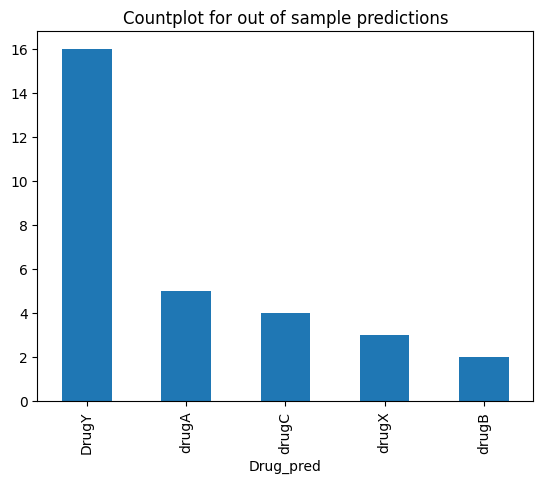

In [71]:
xnew['Drug_pred'].value_counts().plot(kind='bar', title='Countplot for out of sample predictions')

### Save above results to csv

In [72]:
xnew.to_csv('Result.csv', index=False)